## Analisis de Ingenieria de Caracteristicas

Este es un conjunto de datos que requiere mucho preprocesamiento con información EDA sorprendente para una empresa.

¡Comprueba los nombres de las columnas y encuentra el error allí mismo! Los nombres de las columnas no son los que ves
Eliminar el signo '$' y '-' de todas las columnas donde estén presentes
Cambie el tipo de datos de objetos a int después de los dos anteriores.
Desafío: Intenta eliminar "," (coma) de todos los números numéricos.
Intente trazar un gráfico de las ventas y las ganancias con respecto a la línea de tiempo.

https://www.kaggle.com/code/rajatraj0502/company-financials-dataset

https://www.kaggle.com/code/gigsoll/number-of-sales-prediction-with-gradient-boosting

Aqui analizaremos a detalle sobre, los datos duplicados, nulos, atipicos, faltantees, etc. Para poder entenderlos y asi saber que debemos hacer con ellos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import missingno
import pyreadr
import session_info
import upsetplot
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline
sns.set(style="darkgrid")


import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

%run extenciones-datos-faltantes.ipynb

C:\Users\TERABYTE10\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\TERABYTE10\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [69]:
data_pre= pd.read_csv("D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/Financials.csv")

In [70]:
data_pre.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

Como podemos observar hay espacios en los nombres de las columnas. asi que lo arreglaremos

In [71]:
data_pre.columns = data_pre.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data_pre.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

In [72]:
column_to_clean = ["units_sold", "manufacturing_price", "sale_price", "gross_sales", "discounts", "sales", "cogs", "profit"]

for column in column_to_clean:
    data_pre[column] = data_pre[column].str.replace('$', '').str.replace(',', '').str.replace('-', '')
    data_pre[column] = data_pre[column].replace('',np.nan)

#Convert data to datetime format
data_pre['date'] = pd.to_datetime(data_pre['date'])

Limpiamos lo basico de la data y proseguiremos con el análisis

In [86]:
data= pd.read_csv("D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/Financials_.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [87]:
data.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,,32370.0,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,,26420.0,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,,32670.0,21780.0,10890.00,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,,13320.0,8880.0,4440.00,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,,37050.0,24700.0,12350.00,2014-01-06,6,June,2014


In [88]:
data.shape

(700, 16)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              700 non-null    object 
 1   country              700 non-null    object 
 2   product              700 non-null    object 
 3   discount_band        700 non-null    object 
 4   units_sold           700 non-null    float64
 5   manufacturing_price  700 non-null    float64
 6   sale_price           700 non-null    float64
 7   gross_sales          700 non-null    float64
 8   discounts            700 non-null    object 
 9   sales                700 non-null    float64
 10  cogs                 700 non-null    float64
 11  profit               700 non-null    object 
 12  date                 700 non-null    object 
 13  month_number         700 non-null    int64  
 14  month_name           700 non-null    object 
 15  year                 700 non-null    int

In [90]:
data.describe(include="all")

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
count,700,700,700,700,700.000000,700.000000,700.000000,7.000000e+02,700,7.000000e+02,700.000000,700,700,700.000000,700,700.000000
unique,5,5,6,4,NaN,NaN,NaN,NaN,515,NaN,NaN,557,16,NaN,12,NaN
top,Government,Canada,Paseo,High,NaN,NaN,NaN,NaN,,NaN,NaN,,2014-01-06,NaN,October,NaN
freq,300,140,202,245,NaN,NaN,NaN,NaN,53,NaN,NaN,5,70,NaN,140,NaN
mean,NaN,NaN,NaN,NaN,1608.294286,96.477143,118.428571,1.827594e+05,NaN,1.696091e+05,145475.211429,NaN,NaN,7.900000,NaN,2013.750000
std,NaN,NaN,NaN,NaN,867.427859,108.602612,136.775515,2.542623e+05,NaN,2.367263e+05,203865.506118,NaN,NaN,3.377321,NaN,0.433322
min,NaN,NaN,NaN,NaN,200.000000,3.000000,7.000000,1.799000e+03,NaN,1.655080e+03,918.000000,NaN,NaN,1.000000,NaN,2013.000000
25%,NaN,NaN,NaN,NaN,905.000000,5.000000,12.000000,1.739175e+04,NaN,1.592800e+04,7490.000000,NaN,NaN,5.750000,NaN,2013.750000
50%,NaN,NaN,NaN,NaN,1542.500000,10.000000,20.000000,3.798000e+04,NaN,3.554020e+04,22506.250000,NaN,NaN,9.000000,NaN,2014.000000
75%,NaN,NaN,NaN,NaN,2229.125000,250.000000,300.000000,2.790250e+05,NaN,2.610775e+05,245607.500000,NaN,NaN,10.250000,NaN,2014.000000


In [92]:
data.dtypes.value_counts()

object     8
float64    6
int64      2
Name: count, dtype: int64

In [94]:
cols_cat = ["segment","country","product","discount_band"]
for col in cols_cat:
    print(f"Columna '{col}' tiene {data[col].nunique()} subniveles {data[col].unique()}")

Columna 'segment' tiene 5 subniveles ['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']
Columna 'country' tiene 5 subniveles ['Canada' 'Germany' 'France' 'Mexico' 'United States of America']
Columna 'product' tiene 6 subniveles [' Carretera ' ' Montana ' ' Paseo ' ' Velo ' ' VTT ' ' Amarilla ']
Columna 'discount_band' tiene 4 subniveles [' None ' ' Low ' ' Medium ' ' High ']


### Exploracion de datos duplicados

In [95]:
data.duplicated().any()

False

In [96]:
data.duplicated().sum()

0

### Exploración de datos nulos

In [97]:
null_values = ['NaN', 'nan', 'null', 'None', '', ' ']

# Reemplazar estos valores en el DataFrame con np.nan
data.replace(null_values, np.nan, inplace=True)

In [98]:
data['discounts'] = pd.to_numeric(data['discounts'], errors='coerce')
data['profit'] = pd.to_numeric(data['profit'], errors='coerce')
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [101]:
data.dtypes.value_counts()

float64           8
object            5
int64             2
datetime64[ns]    1
Name: count, dtype: int64

In [99]:
data.dtypes

segment                        object
country                        object
product                        object
discount_band                  object
units_sold                    float64
manufacturing_price           float64
sale_price                    float64
gross_sales                   float64
discounts                     float64
sales                         float64
cogs                          float64
profit                        float64
date                   datetime64[ns]
month_number                    int64
month_name                     object
year                            int64
dtype: object

In [100]:
valores_faltantes = data.isnull().sum()
print(f"Los valores faltantes por columns son:\n {valores_faltantes}")

Los valores faltantes por columns son:
 segment                 0
country                 0
product                 0
discount_band           0
units_sold              0
manufacturing_price     0
sale_price              0
gross_sales             0
discounts              53
sales                   0
cogs                    0
profit                 63
date                    0
month_number            0
month_name              0
year                    0
dtype: int64


In [103]:
data.missing.number_missing()

116

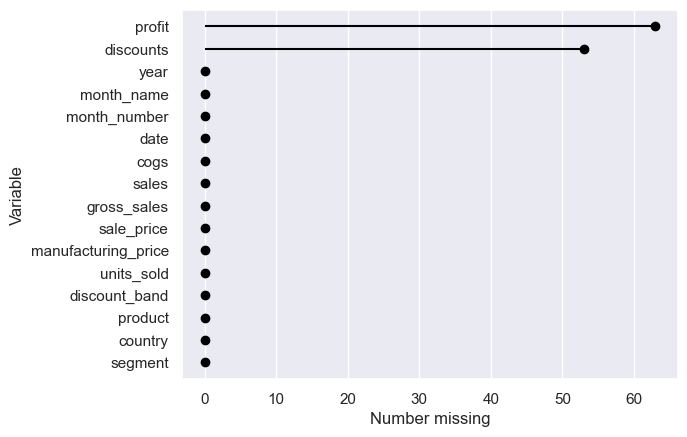

In [105]:
data.missing.missing_variable_plot()

<Figure size 400x400 with 0 Axes>

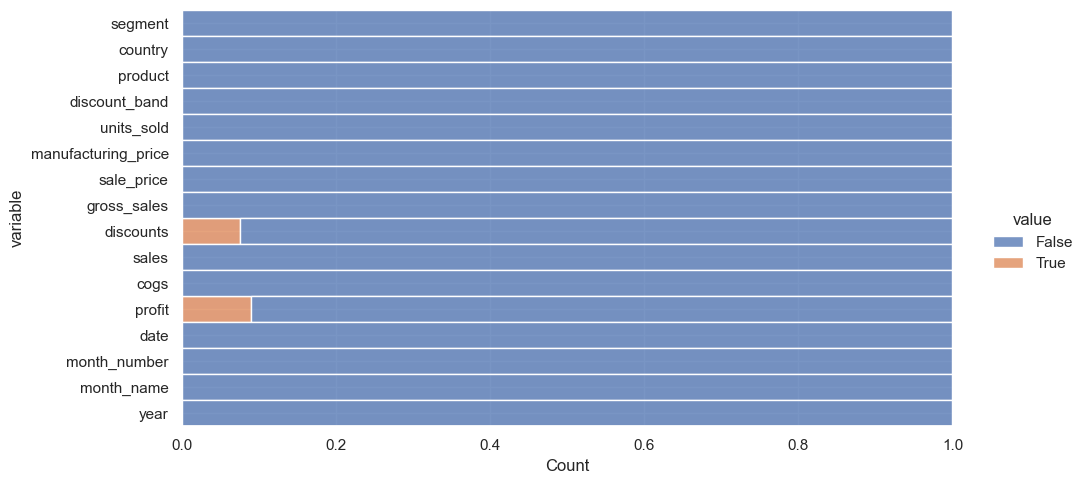

In [108]:
plt.figure(figsize=(4, 4))
data.isnull().melt().pipe(lambda data:(sns.displot(data=data, y= "variable", hue="value", multiple="fill", aspect=2)))
plt.show()

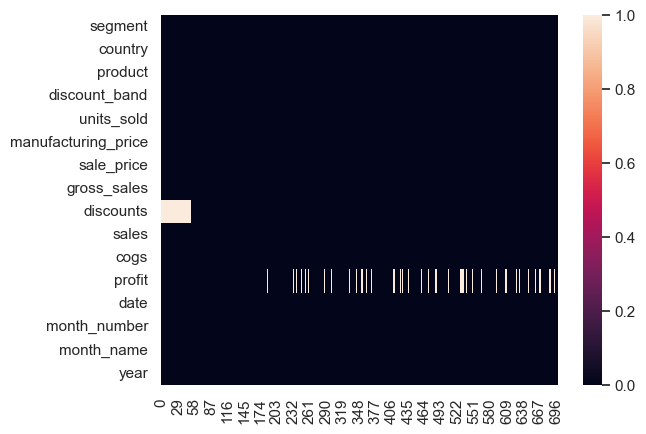

In [109]:
data.isnull().transpose().pipe(lambda data: (sns.heatmap(data=data)))
plt.show()

In [110]:
data.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,segment,0,700,0.000000
1,country,0,700,0.000000
2,product,0,700,0.000000
3,discount_band,0,700,0.000000
4,units_sold,0,700,0.000000
5,manufacturing_price,0,700,0.000000
6,sale_price,0,700,0.000000
7,gross_sales,0,700,0.000000
8,discounts,53,700,7.571429
9,sales,0,700,0.000000


In [111]:
data.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,1,5.555556
1,1,1,5.555556
2,2,1,5.555556
3,3,1,5.555556
4,4,1,5.555556
...,...,...,...
695,695,0,0.000000
696,696,0,0.000000
697,697,0,0.000000
698,698,0,0.000000


In [112]:
data.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,14,87.50
1,53,1,6.25
2,63,1,6.25


In [113]:
data.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,584,83.428571
1,1,116,16.571429


In [117]:
data.missing.missing_variable_span(variable="units_sold", span_every=10)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,10,0.0,100.0
1,1,0,10,0.0,100.0
2,2,0,10,0.0,100.0
3,3,0,10,0.0,100.0
4,4,0,10,0.0,100.0
...,...,...,...,...,...
65,65,0,10,0.0,100.0
66,66,0,10,0.0,100.0
67,67,0,10,0.0,100.0
68,68,0,10,0.0,100.0


In [118]:
data.missing.missing_variable_run(variable="units_sold")

,run_length,is_na
0,700,complete


In [119]:
data.missing.sort_variables_by_missingness()

,profit,discounts,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,sales,cogs,date,month_number,month_name,year
0,16185.00,NaN,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,32370.00,16185.0,2014-01-01,1,January,2014
1,13210.00,NaN,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,26420.00,13210.0,2014-01-01,1,January,2014
2,10890.00,NaN,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,32670.00,21780.0,2014-01-06,6,June,2014
3,4440.00,NaN,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,13320.00,8880.0,2014-01-06,6,June,2014
4,12350.00,NaN,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,37050.00,24700.0,2014-01-06,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,12375.00,111375.00,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,631125.00,618750.0,2014-01-03,3,March,2014
696,2730.00,24570.00,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,139230.00,136500.0,2014-01-10,10,October,2014
697,1299.60,1436.40,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,8139.60,6840.0,2014-01-02,2,February,2014
698,686.85,759.15,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,4301.85,3615.0,2014-01-04,4,April,2014


In [120]:
data.missing.missing_scan_count(search=data)

,variable,n,original_type
0,segment,0,object
1,country,0,object
2,product,0,object
3,discount_band,0,object
4,units_sold,0,float64
5,manufacturing_price,0,float64
6,sale_price,0,float64
7,gross_sales,0,float64
8,discounts,0,float64
9,sales,0,float64


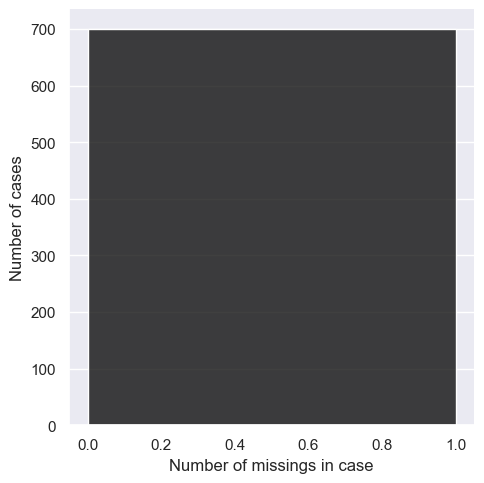

In [121]:
data.missing.missing_case_plot()

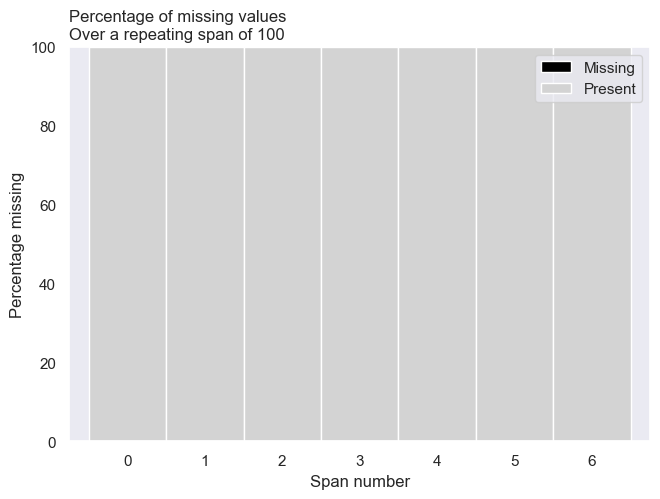

In [122]:
data.missing.missing_variable_span_plot(variable="units_sold", span_every=100,rot=0)

<Axes: >

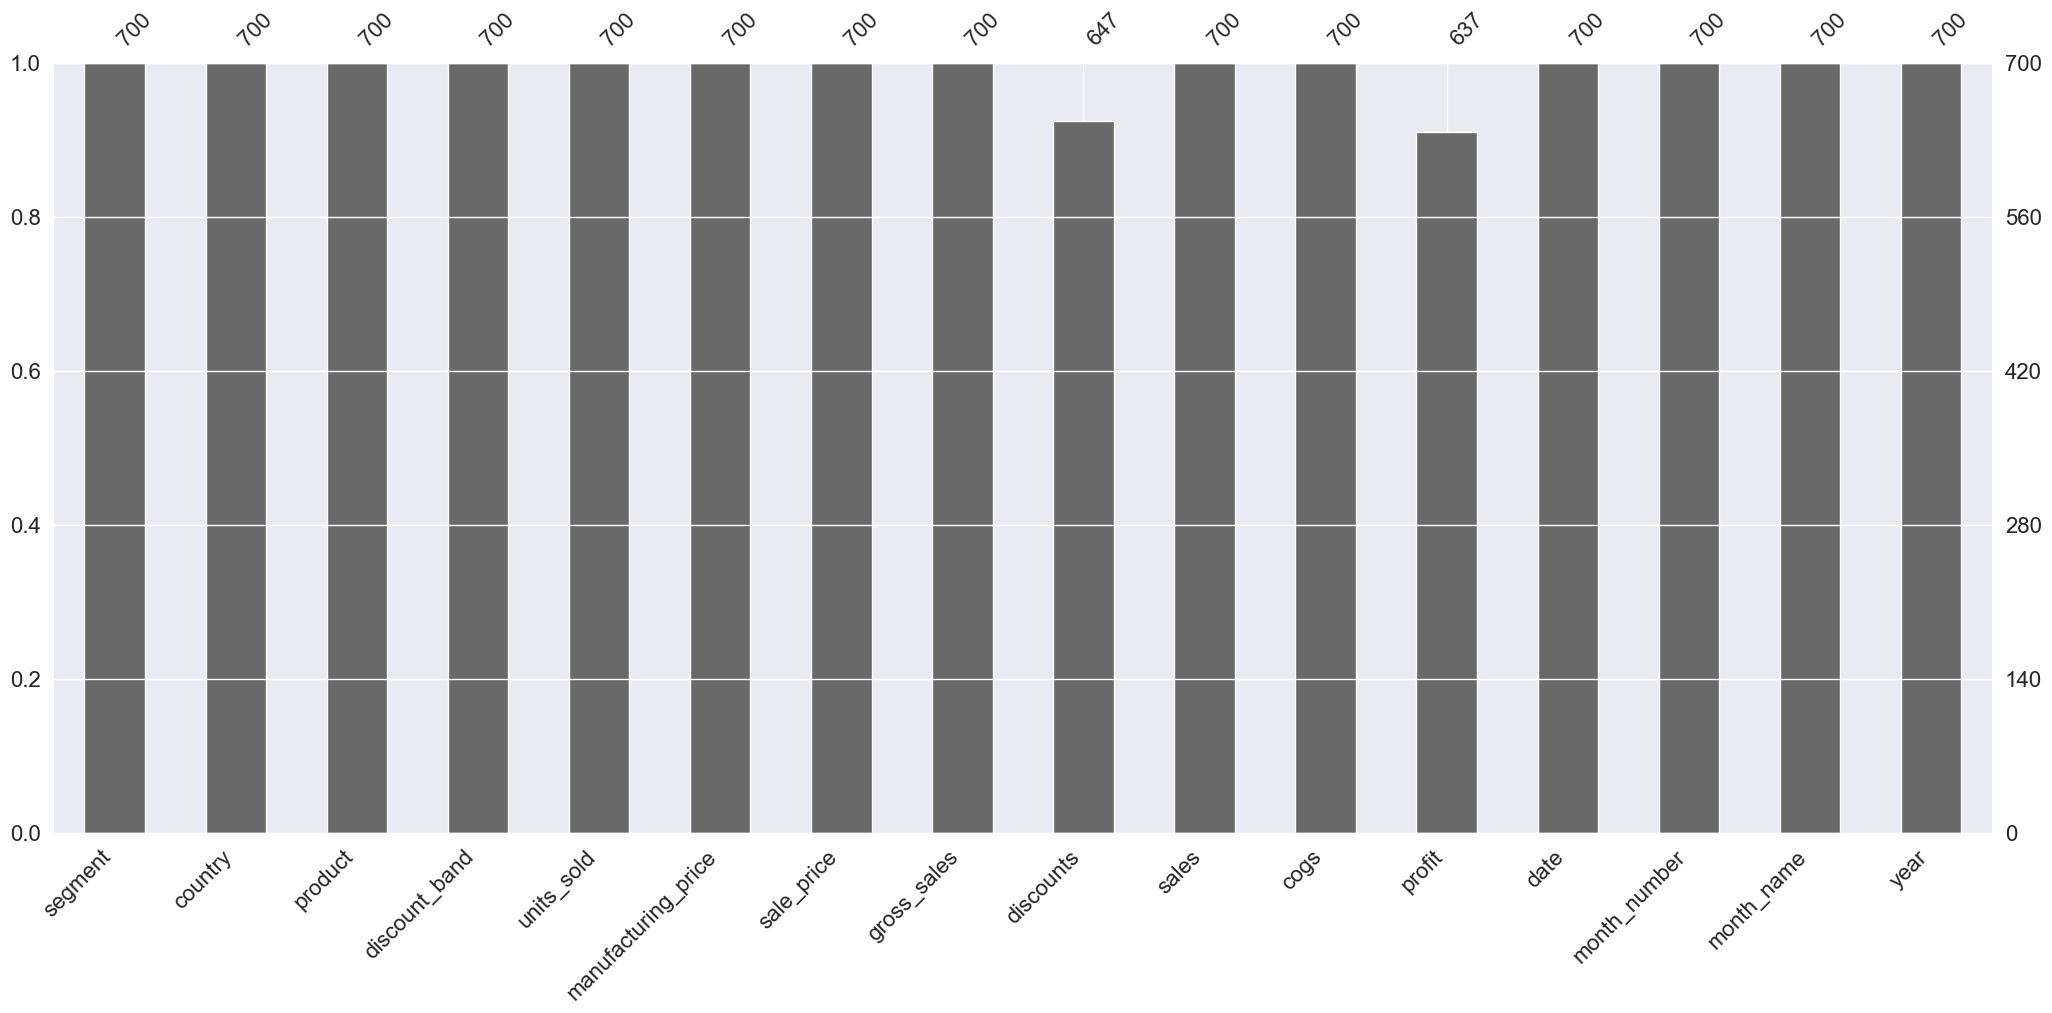

In [123]:
missingno.bar(df= data)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

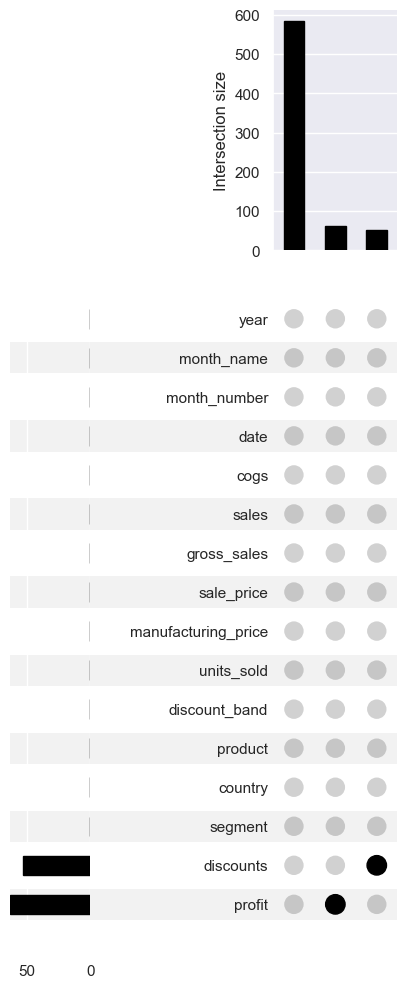

In [124]:
data.missing.missing_upsetplot(variables=None, element_size=40)

### Exploración de datos atipicos

In [126]:
data_numeric = data.select_dtypes(include=["float64", "int64"])
q1 = data_numeric.quantile(0.25)
q3 = data_numeric.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

outiliers = (data_numeric<limite_inferior) | (data_numeric>limite_superior)
print(f"los valores atipicos por columna son: \n {outiliers.sum()}")

los valores atipicos por columna son: 
 units_sold               4
manufacturing_price      0
sale_price               0
gross_sales             55
discounts               57
sales                   53
cogs                    36
profit                  93
month_number             0
year                   175
dtype: int64


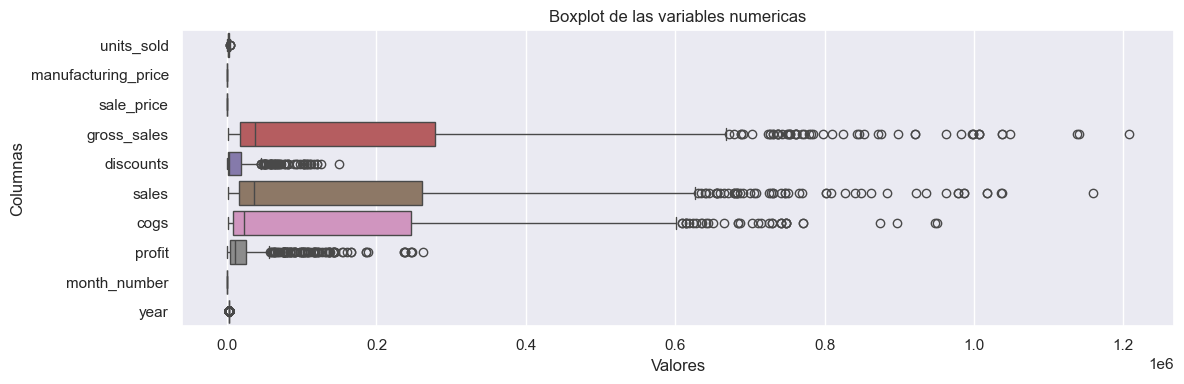

In [127]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data_numeric, orient="h")
plt.title("Boxplot de las variables numericas")
plt.ylabel("Columnas")
plt.xlabel("Valores")
plt.tight_layout()
plt.show()